# Simple RNN for time series generation

### Method

Heavily based on [this website](https://www.geeksforgeeks.org/multivariate-time-series-forecasting-with-lstms-in-keras/)

In [39]:
import datetime
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
import math
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(99)

In [40]:
dim = 1
data = np.loadtxt(f'sine_data/sine_123_1000_{dim}.csv', delimiter = ",",skiprows = 1) # Simple sine
# data = np.loadtxt(f'complex_sine_data/extra_comp_sine_123_1000_{dim}.csv', delimiter = ",",skiprows = 1) # Complex sine
data = pd.DataFrame(data)

In [41]:
imputer = SimpleImputer(missing_values=np.nan) # Handling missing values
dataFrame = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
dataFrame = dataFrame.reset_index(drop=True)
# Applying feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(dataFrame.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(dataFrame.columns))
target_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = target_scaler.fit_transform(dataFrame.to_numpy())
df_scaled = pd.DataFrame(df_scaled.astype(float))


In [42]:
# Single step dataset preparation
def singleStepSampler(df, window):
	xRes = []
	yRes = []
	for i in range(0, len(df) - window):
		res = []
		for j in range(0, window):
			r = []
			for col in df.columns:
				r.append(df[col][i + j])
			res.append(r)
		xRes.append(res)
		yRes.append(df.iloc[i + window].values)
	return np.array(xRes), np.array(yRes)


In [43]:
# Dataset splitting
SPLIT = 0.8
(xVal, yVal) = singleStepSampler(df_scaled, 20)
X_train = xVal[:int(SPLIT * len(xVal))]
y_train = yVal[:int(SPLIT * len(yVal))]
X_test = xVal[int(SPLIT * len(xVal)):]
y_test = yVal[int(SPLIT * len(yVal)):]
horizon = len(X_test)


In [44]:

multivariate_lstm = keras.Sequential()
multivariate_lstm.add(keras.layers.LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2])))
multivariate_lstm.add(keras.layers.Dropout(0.2))
multivariate_lstm.add(keras.layers.Dense(dim, activation='linear'))
multivariate_lstm.compile(loss = 'MeanSquaredError', metrics=['MAE'], optimizer='Adam')
multivariate_lstm.summary()

2024-05-14 13:47:15.466900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 13:47:15.495475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 13:47:15.513980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 200)               162400    
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 162,601
Trainable params: 162,601
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = multivariate_lstm.fit(X_train, y_train, epochs=20)


Epoch 1/20


2024-05-14 13:47:18.952068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 13:47:18.965188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 13:47:18.977295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 22s 129ms/step - loss: 0.0822 - MAE: 0.2204
Epoch 2/20
25/25 [==============================] - 6s 247ms/step - loss: 0.0492 - MAE: 0.1824
Epoch 3/20
25/25 [==============================] - 5s 212ms/step - loss: 0.0474 - MAE: 0.1812
Epoch 4/20
25/25 [==============================] - 5s 187ms/step - loss: 0.0472 - MAE: 0.1808
Epoch 5/20
25/25 [==============================] - 6s 243ms/step - loss: 0.0471 - MAE: 0.1806
Epoch 6/20
25/25 [==============================] - 4s 146ms/step - loss: 0.0472 - MAE: 0.1806
Epoch 7/20
25/25 [==============================] - 4s 147ms/step - loss: 0.0470 - MAE: 0.1805
Epoch 8/20
25/25 [==============================] - 4s 179ms/step - loss: 0.0470 - MAE: 0.1804
Epoch 9/20
25/25 [==============================] - 5s 188ms/step - loss: 0.0469 - MAE: 0.1804
Epoch 10/20
25/25 [==============================] - 4s 157ms/step - loss: 0.0469 - MAE: 0.1802
Epoch 11/20
25/25 [==============================] - 4s 156

In [46]:
predicted_values = multivariate_lstm.predict(X_test)

2024-05-14 13:49:08.400399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 13:49:08.413197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 13:49:08.418753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 2s 64ms/step


<class 'numpy.ndarray'>


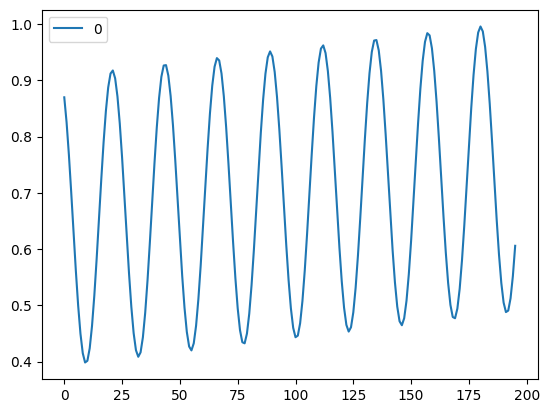

In [47]:
import os
print(type(predicted_values))
pred_df = pd.DataFrame(predicted_values)
pred_df.plot(subplots=True)

# Save generated data to csv
x = datetime.datetime.now()

timestamp = x.strftime("%d%m%y_%Hh%M")
# generated_df = list_to_df(generated_data)

filepath = os.path.join('synt_data', 'lstm', f'lstm_sine_{dim}_{horizon}_{timestamp}.csv')
# filepath = os.path.join('synthetic_complex_sines', 'lstm', f'extra_comp_syn_sine_{dim}_{horizon}_{timestamp}.csv')
if dim == 1:
    pred_df.to_csv(filepath)
else:
    pred_df.to_csv(filepath, index=False)